In [1]:
import numpy as np
from fit_func import load_helper
from torch_fit import one_peak_map_fit, two_peak_map_fit
import matplotlib.pyplot as plt
import time

In [2]:
x_input, y_input = load_helper('spectrums.txt')

In [3]:
si_params = one_peak_map_fit(x_input, y_input[:,:,:])
params = two_peak_map_fit(x_input, y_input[:,:,:])

correction = si_params['peak_0_centers'] - 520.0
E_peak_pos = params['peak_0_centers'] - correction
A_peak_pos = params['peak_1_centers'] - correction

peak_pos = np.array([E_peak_pos, A_peak_pos])
strain = -0.20 * E_peak_pos + 0.03 * A_peak_pos
doping = -0.15 * E_peak_pos + 0.47 * A_peak_pos
info = np.array([strain, doping, E_peak_pos, A_peak_pos])

Apple M series GPU acceleration enabled.


Loss 9.901922304 : 100%|██████████| 250/250 [00:06<00:00, 40.25it/s] 


Apple M series GPU acceleration enabled.
Running initial fit, guess 384.0 and 404.0...


Loss 5.476153344 : 100%|██████████| 250/250 [00:15<00:00, 16.13it/s]


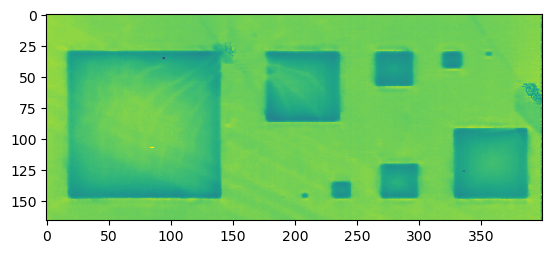

In [4]:
plt.imshow(E_peak_pos)

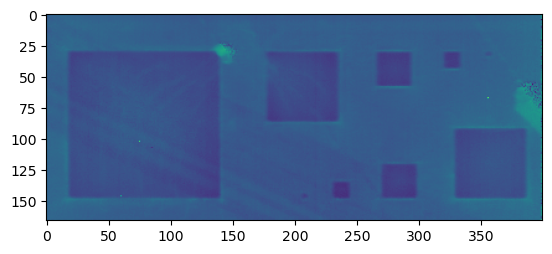

In [5]:
plt.imshow(A_peak_pos)

In [ ]:
# # Save result
np.save('_fit_result', info)
np.save('_peak_positions', peak_pos)